Algoritmo genético
==================



## Introdução



`Algoritmos genéticos` são algoritmos inspirados na teoria da evolução de Darwin e são ferramentas poderosas para resolver problemas de otimização. De maneira simples, a estratégia consiste em gerar uma população inicial aleatória e através de seleção, cruzamento e mutação sucessivas, gerar populações seguintes. Se feito de maneira correta, as populações seguintes tendem a ser melhores candidatos para a solução do problema do que as populações anteriores.

Um algoritmo genético pode parecer um tanto complexo, porém é possível dividi-lo em partes relativamente simples:

1.  Criação da população inicial (aleatória)

2.  Cálculo da função objetivo para todos os membros da população inicial e atualização do hall da fama

3.  Seleção dos indivíduos (quais seguem pra próxima geração)

4.  Cruzamento dos indivíduos selecionados (troca de material genético)

5.  Mutação dos indivíduos da população recém-criada (possibilidade de trazer informação nova ao sistema)

6.  Cálculo da função objetivo para todos os membros da população recém-criada e atualização do hall da fama

7.  Checar os critérios de parada. Caso os critérios não tenham sido atendidos, retornar ao passo 3

8.  Retornar para o usuário o hall da fama



## Glossário



-   `Indivíduo`: um candidato para a solução do problema

-   `População`: um conjunto de candidatos para a solução do problema

-   `Gene`: um parâmetro que pertence a um indivíduo

-   `Cromossomo` ou `genótipo`: um conjunto de genes

-   `Geração`: cada população em uma busca genética faz parte de uma geração. A primeira geração é geralmente formada por indivíduos aleatórios (sorteados dentro do espaço de busca). As gerações seguintes são formadas por seleção, cruzamento e mutação da geração anterior. Um dos critérios de parada possíveis para um algoritmo genético é o número máximo de gerações

-   `Função de aptidão` ou `função objetivo` ou `função fitness`: uma função que recebe um indivíduo e retorna o seu valor de aptidão. Em um problema de otimização, nós buscamos encontrar soluções que minimizam ou maximizam o valor de aptidão

-   `Seleção`: processo onde utilizamos o valor de aptidão dos indivíduos para selecionar quais irão passar seus genes para a geração seguinte

-   `Cruzamento`: processo onde o material genético de indivíduos selecionados é misturado

-   `Mutação`: processo onde os genes dos indivíduos selecionados têm uma chance de alterar seu valor. A mutação é o único processo capaz de introduzir informação nova ao pool genético após o sorteio aleatório da primeira geração

-   `Hall da fama`: conjunto dos $n$ indivíduos que obtiveram os melhores valores de aptidão durante o processo de busca



## Reflexões



Você diria que o algoritmo genético é determinístico ou probabilístico?

Será que um algoritmo genético é capaz de encontrar mínimos (ou máximos) da função objetivo?

O que será que acontece quando não realizamos a etapa de mutação do algoritmo genético?

O que será que acontece quando usamos uma chance de mutação muito alta?



## Objetivo



Encontrar uma solução para o problema das caixas binárias usando o algoritmo genético. Considere 4 caixas.



## Descrição do problema



O problema das caixas binárias é simples: nós temos um certo número de caixas e cada uma pode conter um valor do conjunto $\{0, 1\}$. O objetivo é encontrar uma combinação de caixas onde a soma dos valores contidos dentro delas é máximo.



## Importações



In [1]:
from funcoes import populacao_cb as cria_populacao_inicial
from funcoes import funcao_objetivo_pop_cb as funcao_objetivo_pop
from funcoes import selecao_roleta_max as selecao_roleta
from funcoes import cruzamento_ponto_simples as cruzamento
from funcoes import mutacao_cb as mutacao
import random as rd
import numpy as np
import matplotlib.pyplot as plt

## Códigos e discussão



In [2]:
# constantes

TAMANHO_POP = 6
NUM_GENES = 4
NUM_GERACOES = 57
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05

População original:

[[0, 1, 1, 0], [0, 1, 1, 0], [0, 0, 1, 1], [1, 1, 0, 1], [1, 1, 1, 0], [1, 0, 0, 0]]

População final:

[[1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]]



Text(0.5, 1.0, 'Fitness em função da geração')

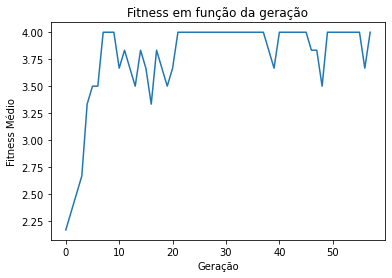

In [3]:
populacao = cria_populacao_inicial(TAMANHO_POP, NUM_GENES)
media_fitness = [np.mean(funcao_objetivo_pop(populacao))]

print("População original:")
print()
print(populacao)
print()

for _ in range(NUM_GERACOES):
    # Fazendo a seleção:
    fitness = funcao_objetivo_pop(populacao)
    populacao = selecao_roleta(populacao, fitness)

    # Fazendo o cruzamento:
    pais = populacao[0::2]
    maes = populacao[1::2]

    contador = 0
    for pai, mae in zip(pais, maes):
        if rd.random() < CHANCE_CRUZAMENTO:
            # vai cruzar :)
            filho1, filho2 = cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
            contador = contador + 2
    for n in range(len(populacao)):
        if rd.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = mutacao(individuo)
    fitness_depois = funcao_objetivo_pop(populacao)
    media_fitness.append(np.mean(fitness_depois))
print("População final:")
print()
print(populacao)
print()

fig, ax = plt.subplots(1, 1)
ax.plot(range(len(media_fitness)), media_fitness)
ax.set_xlabel("Geração")
ax.set_ylabel("Fitness Médio")
ax.set_title("Fitness em função da geração")

## Conclusão



Concluo que o algoritmo genético é probabilístico, porém não tão aleatório quanto o de busca aleatória, já que ele é "guiado" pela seleção, onde as probabilidades não são iguais. Além disso, vemos pelo gráfico de função objetivo em função da geração que de fato a população tende ao melhor valor, mesmo que nem sempre meximize totalmente. 

## Playground



In [4]:
# Testando solução do bug de pesos:

populacao = []
for i in range(5):
    l = []
    for k in range(4):
        l.append(0)
    populacao.append(l)

print('População original:')
print()
print(populacao)
print()

for _ in range(NUM_GERACOES):
    fitness = funcao_objetivo_pop(populacao)
    populacao = selecao_roleta(populacao, fitness)

print('População final:')
print()
print(populacao)

População original:

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

População final:

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
